In [1]:
# chargement des bibliothèques nécessaires pour le projet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/weatherAUS.csv', header=0, index_col=0, parse_dates=[0])

In [3]:
# taille du dataframe
df.shape

(145460, 22)

In [3]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# création d'une liste contenant les noms des variables
liste_variables = df.columns.drop('Location')

In [5]:
# fonction qui compte le pourcentage de valeurs manquantes dans une colonne
def nan_rate_count(col):
    nr = round(col.isna().sum()/col.shape[0]*100, 2)
    return nr

In [6]:
# application "nan_rate_count" au jeu de données
nan_map = df.groupby('Location').agg(nan_rate_count)

In [8]:
# création de la liste des stations
liste_stations = df['Location'].unique()

In [9]:
# création d'un dictionnaire de dataframe, avec un dataframe par station
dict_df_station = dict()
for station in liste_stations: 
    dict_df_station[station] = df.loc[df['Location'] == station]

In [10]:
# création de deux dictionnaires, 
# où la clé est la station,
# et la valeur est soit la liste des variables mesurées pour cette station, 
# soit la liste des variables non mesurées pour cette station

dict_variables_mesurees_par_station = dict() # dictionnaire des variables mesurées par station
dict_variables_non_mesurees_par_station = dict() # dictionnaire des variables non mesurées par station

for station in liste_stations:

    df_local = dict_df_station[station] # récupération du dataframe de la station
    
    dict_variables_mesurees_par_station[station] = [] # liste des variables mesurées pour cette station
    dict_variables_non_mesurees_par_station[station] = [] # liste des variables non mesurées pour cette station
    
    for variable in liste_variables:
        if df_local[variable].isna().sum() == df_local.shape[0] : # s'il n'y a que des valeurs manquantes
            dict_variables_non_mesurees_par_station[station].append(variable) # alors la variable est ajoutée
                                                                  # à la liste des variables non mesurées
        else:
            dict_variables_mesurees_par_station[station].append(variable) # sinon, la variable est ajoutée
                                                              # à la liste des variables mesurées
    

In [11]:
# Création d'un dataframe avec les variables en entête de colonnes et les noms des stations en index.
# Pour une variable donnée et une station données, la cellule contient 0 si la variable n'est pas mesurée dans cette station,
#                                                                    sinon la cellule contient 1

df_variables_mesurees = pd.DataFrame(data = np.ones((liste_stations.shape[0], liste_variables.shape[0])),
                                     index = liste_stations,
                                     columns = liste_variables)

for station in liste_stations:
    df_local = dict_df_station[station]
    for variable in liste_variables: 
        if df_local[variable].isna().sum() == df_local.shape[0] :
            df_variables_mesurees.loc[station, variable] = 0

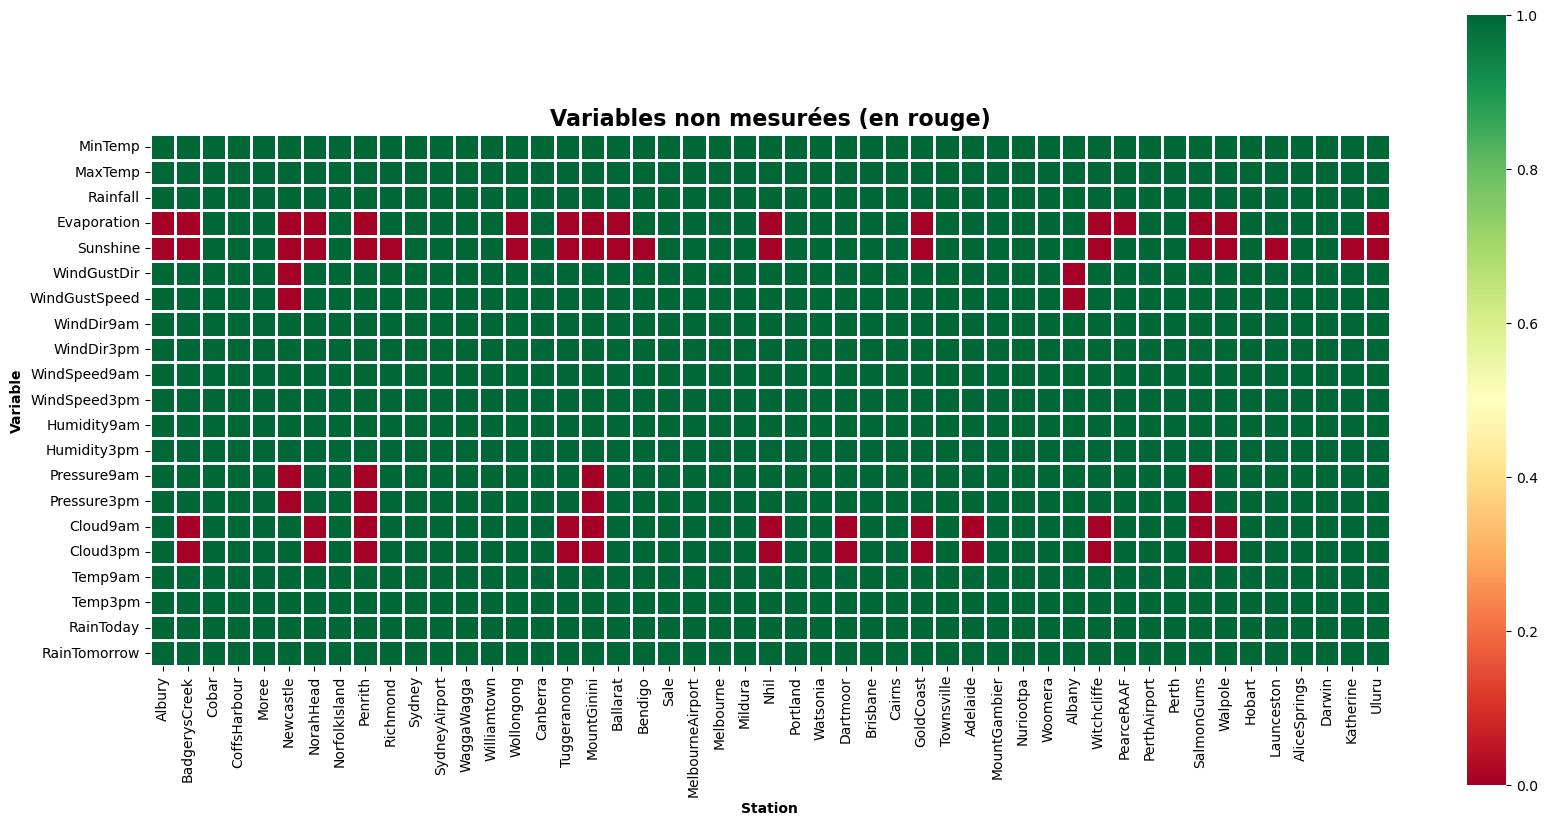

In [13]:
# représentation des grandeurs non mesurées en rouge
plt.figure(figsize = (20,10))
ax = sns.heatmap(df_variables_mesurees.T, annot = False, cmap = "RdYlGn", square = True, linewidth = 1)
plt.title("Variables non mesurées (en rouge)", fontweight = "bold", fontsize = 16)
plt.xlabel("Station", fontweight = "bold")
plt.ylabel("Variable", fontweight = "bold")
#plt.xticks(rotation = 70)
cbar_axes = ax.figure.axes[-1].yaxis.label.set_weight("bold");

In [15]:
# vérification
dict_variables_non_mesurees_par_station['Albury']

['Evaporation', 'Sunshine']

In [16]:
# ensembles_de_variables_non_mesurees est une liste de listes
# chaque liste est un ensemble de variables non mesurées
ensembles_de_variables_non_mesurees = []
for station in liste_stations : 
    if dict_variables_non_mesurees_par_station[station] not in ensembles_de_variables_non_mesurees:
        ensembles_de_variables_non_mesurees.append(dict_variables_non_mesurees_par_station[station])

In [18]:
ensembles_de_variables_non_mesurees

[['Evaporation', 'Sunshine'],
 ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],
 [],
 ['Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'Pressure9am',
  'Pressure3pm'],
 ['Evaporation',
  'Sunshine',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm'],
 ['Sunshine'],
 ['Cloud9am', 'Cloud3pm'],
 ['WindGustDir', 'WindGustSpeed'],
 ['Evaporation']]

In [21]:
variables_non_mesurees = []
for ensemble in ensembles_de_variables_non_mesurees:
    for variable in ensemble:
        if variable not in variables_non_mesurees:
            variables_non_mesurees.append(variable)
            
variables_non_mesurees

['Evaporation',
 'Sunshine',
 'Cloud9am',
 'Cloud3pm',
 'WindGustDir',
 'WindGustSpeed',
 'Pressure9am',
 'Pressure3pm']

In [17]:
dict_stations_par_ensemble_de_variables_non_mesurees = dict()

for i, ensemble in enumerate(ensembles_de_variables_non_mesurees):
    nom_cle = str(i) + "_" + "_".join(ensemble)
    dict_stations_par_ensemble_de_variables_non_mesurees[nom_cle] = []
    for station in liste_stations:
        if dict_variables_non_mesurees_par_station[station] == ensemble:
            dict_stations_par_ensemble_de_variables_non_mesurees[nom_cle].append(station)

dict_stations_par_ensemble_de_variables_non_mesurees

{'0_Evaporation_Sunshine': ['Albury', 'Wollongong', 'Ballarat', 'Uluru'],
 '1_Evaporation_Sunshine_Cloud9am_Cloud3pm': ['BadgerysCreek',
  'NorahHead',
  'Tuggeranong',
  'Nhil',
  'GoldCoast',
  'Witchcliffe',
  'Walpole'],
 '2_': ['Cobar',
  'CoffsHarbour',
  'Moree',
  'NorfolkIsland',
  'Sydney',
  'SydneyAirport',
  'WaggaWagga',
  'Williamtown',
  'Canberra',
  'Sale',
  'MelbourneAirport',
  'Melbourne',
  'Mildura',
  'Portland',
  'Watsonia',
  'Brisbane',
  'Cairns',
  'Townsville',
  'MountGambier',
  'Nuriootpa',
  'Woomera',
  'PerthAirport',
  'Perth',
  'Hobart',
  'AliceSprings',
  'Darwin'],
 '3_Evaporation_Sunshine_WindGustDir_WindGustSpeed_Pressure9am_Pressure3pm': ['Newcastle'],
 '4_Evaporation_Sunshine_Pressure9am_Pressure3pm_Cloud9am_Cloud3pm': ['Penrith',
  'MountGinini',
  'SalmonGums'],
 '5_Sunshine': ['Richmond', 'Bendigo', 'Launceston', 'Katherine'],
 '6_Cloud9am_Cloud3pm': ['Dartmoor', 'Adelaide'],
 '7_WindGustDir_WindGustSpeed': ['Albany'],
 '8_Evaporation'

In [19]:
# affichage sour forme de DataFrame
pd.DataFrame(ensembles_de_variables_non_mesurees)

,0,1,2,3,4,5
0,Evaporation,Sunshine,None,None,None,None
1,Evaporation,Sunshine,Cloud9am,Cloud3pm,None,None
2,None,None,None,None,None,None
3,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Pressure9am,Pressure3pm
4,Evaporation,Sunshine,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
5,Sunshine,None,None,None,None,None
6,Cloud9am,Cloud3pm,None,None,None,None
7,WindGustDir,WindGustSpeed,None,None,None,None
8,Evaporation,None,None,None,None,None


In [20]:
dict_ = dict_stations_par_ensemble_de_variables_non_mesurees

autre_ordre_stations = dict_['2_'] + dict_['8_Evaporation'] + dict_['5_Sunshine'] + dict_['0_Evaporation_Sunshine'] + \
                        dict_['6_Cloud9am_Cloud3pm'] + dict_['7_WindGustDir_WindGustSpeed'] + \
                        dict_['1_Evaporation_Sunshine_Cloud9am_Cloud3pm'] + \
                        dict_['3_Evaporation_Sunshine_WindGustDir_WindGustSpeed_Pressure9am_Pressure3pm'] + \
                        dict_['4_Evaporation_Sunshine_Pressure9am_Pressure3pm_Cloud9am_Cloud3pm']

len(autre_ordre_stations)

49

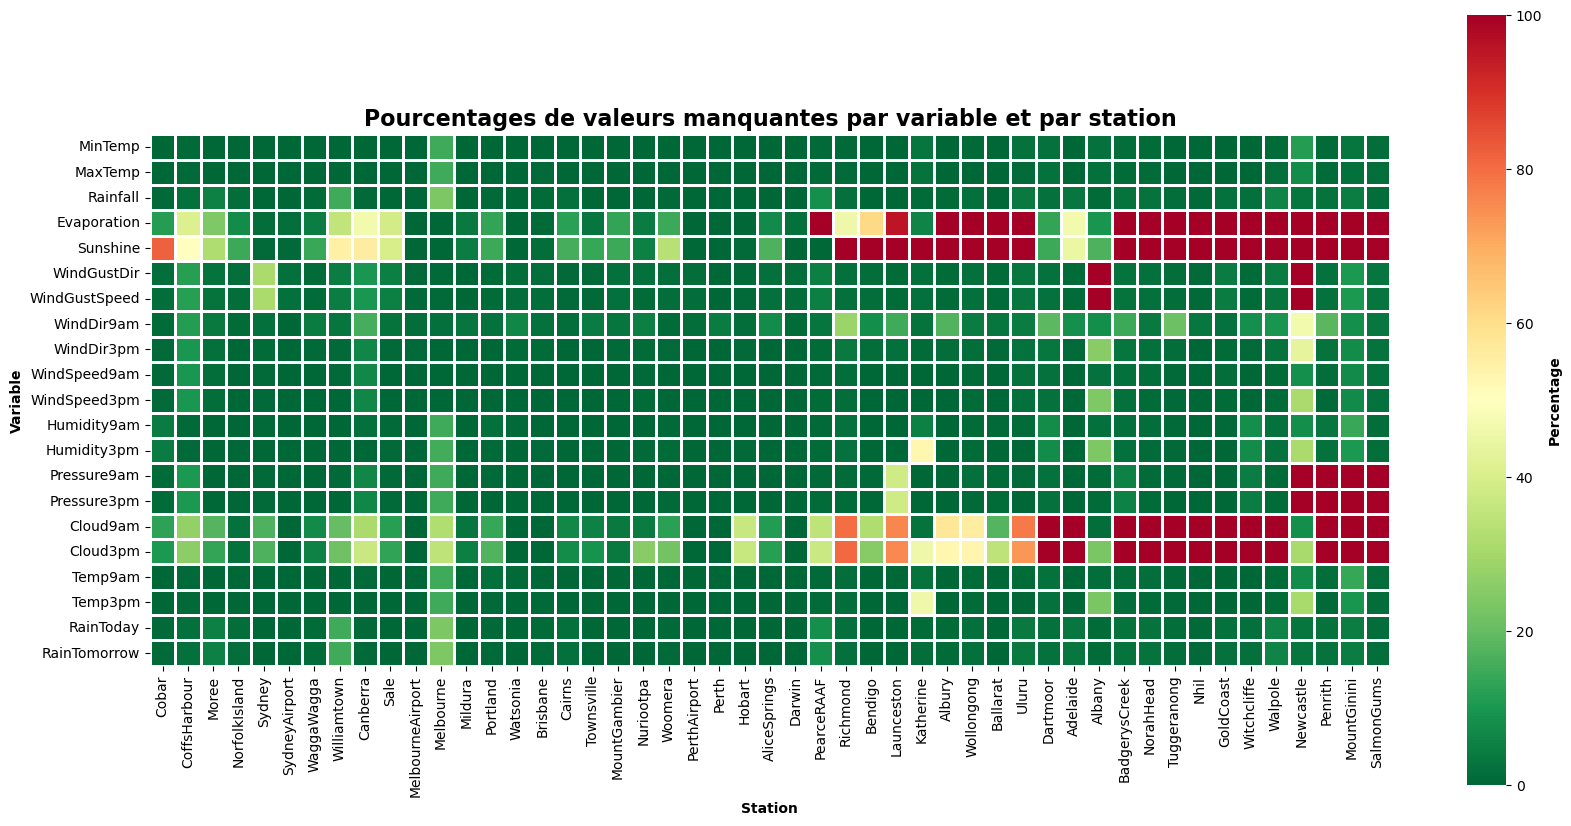

In [24]:
# représentation des grandeurs non mesurées en rouge
plt.figure(figsize = (20,10))
ax = sns.heatmap(nan_map.reindex(index=autre_ordre_stations).T, annot = False, cmap = "RdYlGn_r", square = True, linewidth = 1, annot_kws={"size":6}, fmt=".0f", cbar_kws = {"label": "Percentage"})
plt.title("Pourcentages de valeurs manquantes par variable et par station", fontweight = "bold", fontsize = 16)
plt.xlabel("Station", fontweight = "bold")
plt.ylabel("Variable", fontweight = "bold")
#plt.xticks(rotation = 70)
cbar_axes = ax.figure.axes[-1].yaxis.label.set_weight("bold");

fig = ax.get_figure()
fig.savefig('../figures/valeurs_manquantes_par_variable_et_station.png')

In [23]:
# Remarque : à première vue, le pourcentage de valeurs manquantes pour la variable "Evaporation" à Launceston semble égal à 100.
# Mais le pourcentage est légèrement inférieur à 100 : 95,36%
nan_map.loc[['Launceston'],['Evaporation']]

,Evaporation
Location,
Launceston,95.36
